# Statistical Fundations of Machine Learning
    
Author: Fernando Loro Velardo

Master Of Science Applied Sciences And Engineering: Applied Computer Science
    
## Regression Project:

In this notebook we are going to develop the regression project for the subject Statistical Fundations of Machine Learning. We are going to use two datasets:

    - A synthetic dataset generated using the sklearn.dataset library. This library allows us to create datasets with a custom number of classes, distribution, noise, unbalance...
    - A real world dataset, a Pokemon Dataset with the information of each pokemon. We will try to predict the Attack Points of the pokemon based on his properties such as Color, Type or Defense Points.

For these two regression problems we are going to use two machine learning alogrithms designed for regression problems:
    
    - Linear Regression
    - Random Forest Regressor
    
For each problem, we will train a set of different models tunning the algorithm hyperparameters and selecting a different number of features.

## 1. Synthetic Dataset

In order to investigate and obtain some conclussions we are going to generate a synthetic dataset using the make_regression function from Scikit-learn.

### 1.1 Imports and Generating the Dataset:

We first import the required libraries. We are going to use Scikit-learn for the machine learning part, Matplotlib and Seaborn for the representations, Pandas for the data analysis and manipulation and  NumPy for operating with vectors.

In [582]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold, KFold, cross_validate
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.feature_selection import SelectKBest, f_classif, f_regression

# Show plots in the notebooks
%matplotlib inline

Now we will create the synthetic dataset. This dataset will consists of:

- 50 Samples
- 4 Features (3 of them are informative)
- 1 Dimensional target variable
- Gaussian Noise


In [583]:
data1 = make_regression(n_samples=50, n_features=4, n_informative=3, n_targets=1, 
                        bias=0.0, effective_rank=None,tail_strength=0.5, 
                        noise=7, shuffle=True, coef=False, random_state=None)
synth_dataset = pd.DataFrame(data1[0],columns=['x'+str(i) for i in range(1,5)])
synth_dataset['y'] = data1[1]

In [584]:
synth_dataset.head()

,x1,x2,x3,x4,y
0,-0.188038,1.393059,0.686569,-0.611669,74.425194
1,-0.203520,-0.465951,0.269316,-0.627936,-24.777177
2,-1.498007,-0.903809,1.338179,-0.465671,-137.031752
3,0.873881,0.249396,1.384778,0.783394,103.642834
4,-0.101006,1.082402,0.882976,1.730178,62.529459


### 1.2 Data Analysis:

Now we will obtain the basic information of the dataset:

First we are going to check the size of the dataset and the statistical information

In [585]:
# Basic information of each Dataset

print("Size of the Dataset 1:")
print(synth_dataset.shape)

Size of the Dataset 1:
(50, 5)


As we can see we have a total of 50 samples. The number of features is 4 and 1 target variable.

In [586]:
print("\n" + "Statistical information of Dataset 1:")
synth_dataset.describe()


Statistical information of Dataset 1:


,x1,x2,x3,x4,y
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,-0.276588,-0.024563,-0.031614,-0.316902,-23.690222
std,1.096547,0.971999,0.989737,1.028775,95.421955
min,-3.527032,-1.888586,-3.263886,-2.292947,-239.876349
25%,-1.004928,-0.792528,-0.675076,-0.918837,-86.050902
50%,-0.218670,-0.128489,0.018028,-0.277493,-27.103224
75%,0.285893,0.574717,0.599606,0.350003,32.156133
max,2.022116,1.956566,1.724033,1.730178,177.347549


As we can observe, all variables are numeric. This mean that it wont be necessary to preprocess object types. It is also interesting to notice also that the features vary in similar value ranges. 

### 1.3 Preprocessing:

There is no need to preprocess the information of the synthetic dataset because there are not null or missing values, and all features are numerical.

### 1.4 Data Visualization:

In this part, we will obtain some basic represetations of the data in order to obtain some understanding of the information distribution. We will display the next graphs:
    
    - Histogram with respective Box plot
    - Feature-Target scatter plot with regression and kernel density fits 

#### 1.4.1 Histogram with Box plot

This representation will display the values distribution of each feature in two different ways, first in a Histogram and secondly in a Box plot.

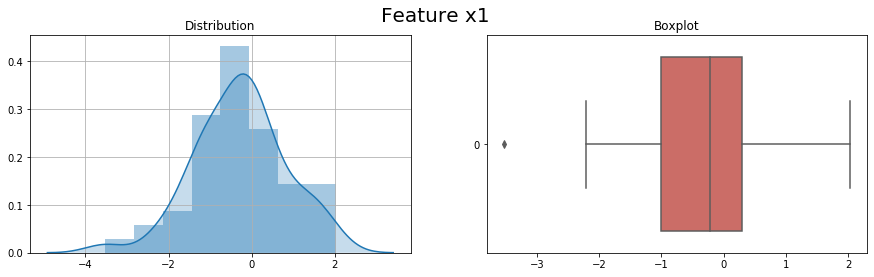

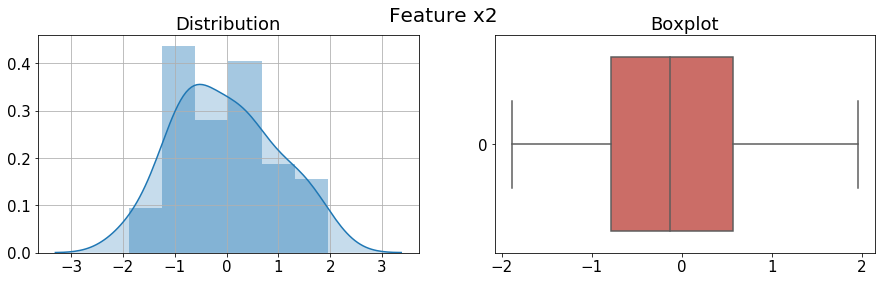

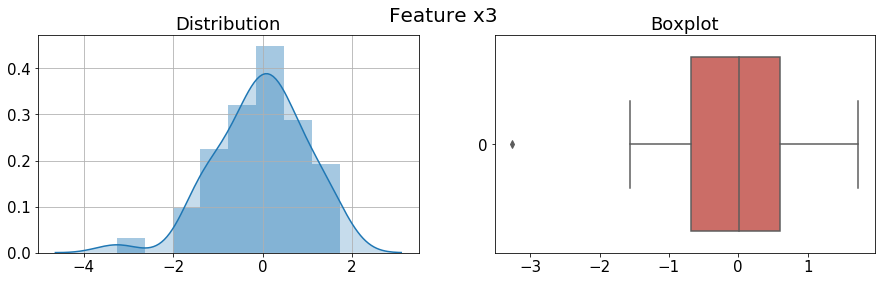

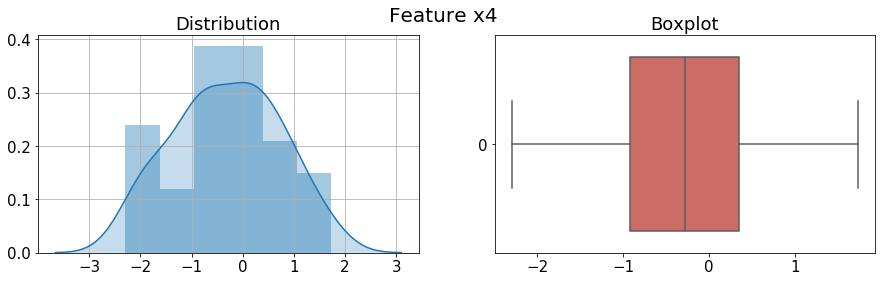

In [587]:
for i in list(synth_dataset.columns.values)[:-1]:
    
    fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False, figsize=(15,4))

    fig.suptitle("Feature " + i, fontsize=20)
    ax[0].title.set_text('Distribution')
    ax[0].grid(True)
    sns.distplot(synth_dataset[i], hist=True, axlabel=False, kde=True, kde_kws={"shade": True}, ax=ax[0])

    ax[1].title.set_text('Boxplot')
    plt.rcParams.update({'font.size': 15})
    sns.boxplot(data=synth_dataset[i], orient="h", palette=sns.color_palette("hls", 8))

    plt.show()

As we can see, features feature distribution approximate to a Gaussian, however we can notice about some deviation or slight disturbance due to the noise. On the Box plot we can observe that there exists just one outlier that should not have a big impact on the result, however these values may increase the mean error. 

#### 1.4.2 Feature-Target scatter plot with regression

In this representation we can obtain a first approach to the regression model. In this case we obtain the regression for each feature and the target. We can also see the distribution or histogram of the represented variables.

<Figure size 1152x720 with 0 Axes>

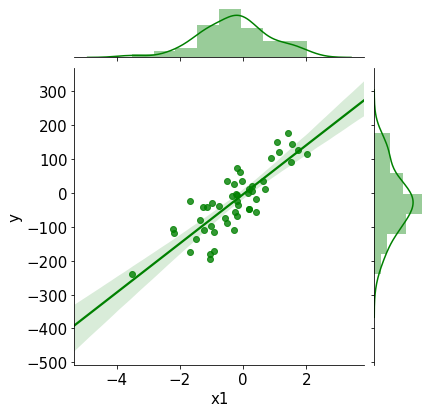

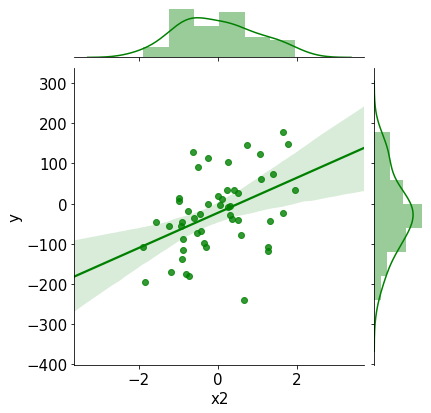

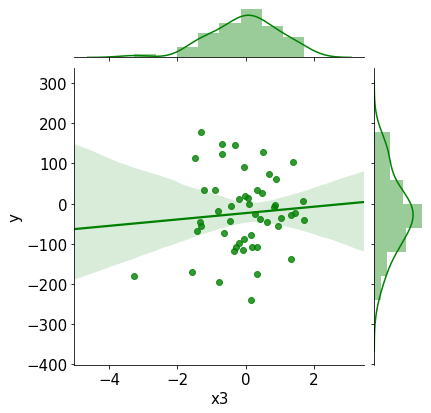

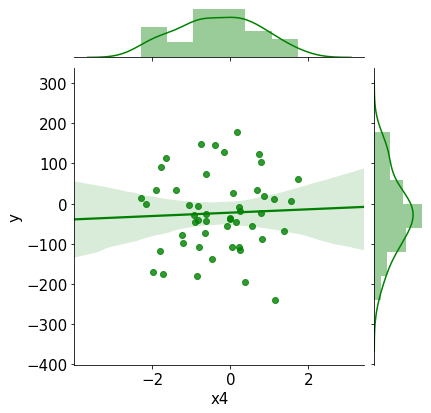

In [588]:
plt.figure(figsize=(16,10))

for i in list(synth_dataset.columns.values)[:-1]:
    sns.jointplot(x=synth_dataset[i], y=synth_dataset["y"], data=synth_dataset, dropna=True, kind='reg', color="g")
    

As we can observe, the target variable distribution is close to a perfect Gaussian. However, the feature variables are pretty dispersed. In the Training phase we will check if we can estimate the Target variable applying two regression models.

### 1.5 Training and Testing:

In this phase we are going to apply two regression algorithms in order to predict the values of the target variable. These two algorithms implemented in the SciKit library are:

    - Linear Regression
    - Random Forest Regressor
    
For each algorithm we will train a set of models based on the number of features used and the hyperparameters of the model (we only perform hyperparameter tunning on the Random Forest Regressor). We will validate each model applying a 5 Cross Fold Validation obtaining the prediction of each fold and it scores. We use the next metrics in order to evauate the model performance:

    - Mean Absolute error
    - Mean Squared error
    - R2 score
    
Finally, for each model, we will display the Predicted-True value plot in order to get a general idea of the model performance.

The procedure followed for obtaining the best model consists of first training the set of models varying the number of features selected for each model. Then we obtain the Mean Absolute Error of each model and select the model with the best performance. Finally, we train again the model with the best performance obtaining the rest of the metrics, the name of the used features and displaying the Predicted-True value plot.

In [589]:
#Dividing the datasets

X = synth_dataset.iloc[:,:-1]
Y = synth_dataset.iloc[:,-1]

#### 1.5.1 Linear Regression

The first algorithm is Linear Regression. We will train a total of 4 models based on the number of features used. In order to obtain the most important features (those more correlated with the target), we use the SelectKBest function based on the F-scored obtained after calculating the correlation between each regressor and the target.

Next we are going to obtain the evaluation scores for the set of models based on this algorithm:

In [590]:
model = LinearRegression()

# 5 Fold Cross Validation
cv = KFold(n_splits=5, shuffle=True)

allscores = []

for i in range(1,5):
    
    #We select the k best features based on the F-value between label and features
    X_selection = SelectKBest(f_regression, k=i).fit_transform(X, Y)
    
    mean_absolute_error_score = []
    
    for train, test in cv.split(X,Y):

        prediction = model.fit(X_selection[train], Y.iloc[train]).predict(X_selection[test])

        mean_absolute_error_score.append(mean_absolute_error(Y.iloc[test], prediction))
    
    allscores.append([i, (np.array(mean_absolute_error_score).mean()), np.array(mean_absolute_error_score).std() * 2])

Once we get all the scores, we are going to train again the model with the best performance obtaining the rest of the metrics, the name of the used features and displaying the Predicted-True value plot. As we are going to repeat this step several times for each algorithm and hyperparameters running, we are going to define a function that outputs the described information absed on the model (applied algorithm), the set of scores and the dataset:

In [591]:
def train_validate_model(model, allscores, X, Y):
    
    #Finding the number of features used in for the best model:

    best_absolute_error = 0
    number_features = 0

    for i in allscores:
        if i[1] - i[2]/2 > best_absolute_error:
            best_absolute_erro = i[1]
            number_features = i[0]

    cv = KFold(n_splits=5, shuffle=True)

    plt.figure(figsize=(12,8))

    #We select the k best features based on the F-value between label and features
    X_selection = SelectKBest(f_regression, k=number_features).fit_transform(X, Y)

    #Evaluation scores
    mean_absolute_error_score = []
    mean_squared_error_score = []
    mean_r2_score = []

    #Fold number
    k = 1

    #5 Fold Cross validation loop:
    for train, test in cv.split(X,Y):

        #Training and obtaining the prediction
        prediction = model.fit(X_selection[train], Y.iloc[train]).predict(X_selection[test])

        mean_absolute_error_score.append(mean_absolute_error(Y.iloc[test], prediction))
        mean_squared_error_score.append(mean_squared_error(Y.iloc[test], prediction))
        mean_r2_score.append(r2_score(Y.iloc[test], prediction))

        plt.scatter(prediction, Y.iloc[test], lw=2, s=100, label='Fold %d' % k)
        k += 1

    #Obtaining the feature used names
    feature_names = list(X.columns.values)
    mask = SelectKBest(score_func=f_regression, k=number_features).fit(X, Y).get_support() #list of boolean
    new_features = [] # The list of K best features
    for bool, feature in zip(mask, feature_names):
        if bool:
            new_features.append(feature)
    print("Number of features used: " + str(len(new_features)))
    print("Features used: " + str(new_features))
    print("Mean Absolute error: " + str(np.array(mean_absolute_error_score).mean()) + " +/- " + str(np.array(mean_absolute_error_score).std() * 2))    
    print("Mean Squared error: " + str(np.array(mean_squared_error_score).mean()) + " +/- " + str(np.array(mean_squared_error_score).std() * 2))
    print("R2 score: "  + str(np.array(mean_r2_score).mean()) + " +/- " + str(np.array(mean_r2_score).std() * 2))

    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.plot([min(Y),max(Y)], [min(Y),max(Y)], linestyle='--', lw=2, color='black')
    plt.legend()
    plt.grid()
    
    return [[np.array(mean_absolute_error_score).mean(), np.array(mean_absolute_error_score).std() * 2],
            [np.array(mean_squared_error_score).mean(), np.array(mean_squared_error_score).std() * 2],
            [np.array(mean_r2_score).mean(), np.array(mean_r2_score).std() * 2]]

Now we will use the function described above in order to obtain result of the best model for the Linear Regression algorithm. 


We will store the resulting scores obtained by the best models in order to compare them at the end.

Number of features used: 4
Features used: ['x1', 'x2', 'x3', 'x4']
Mean Absolute error: 5.942951577740454 +/- 2.135420638512159
Mean Squared error: 51.034113433247015 +/- 30.286409640200986
R2 score: 0.9922685509912993 +/- 0.00811299576574307


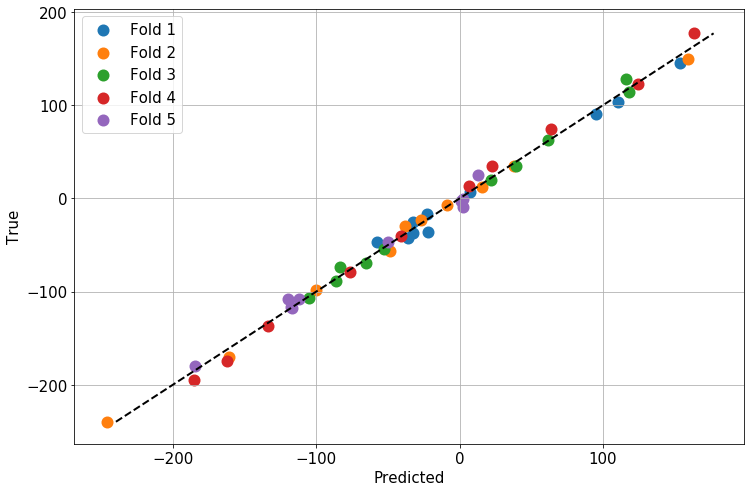

In [592]:
comparission_scores = []

linear_regression_scores = train_validate_model(LinearRegression(), allscores, X, Y)

comparission_scores.append(linear_regression_scores)

#### 2.5.2 Random Forest Regressor

The second algorithm is the Random Forest Regressor. For each hyperparameters configuration we will train again 4 models based on the features used. We will tune the number of estimators (number of trees) with the next value:

    - Number of estimators: 10, 100 and 500
    
Next we are going to obtain the evaluation scores for the set of models using as number of estimators: 10.

In [593]:
model = RandomForestRegressor(n_estimators = 10)

# 5 Fold Cross Validation
cv = KFold(n_splits=5, shuffle=True)

allscores = []

for i in range(1,5):
    
    #We select the k best features based on the F-value between label and features
    X_selection = SelectKBest(f_regression, k=i).fit_transform(X, Y)
    
    mean_absolute_error_score = []
    
    for train, test in cv.split(X,Y):

        prediction = model.fit(X_selection[train], Y.iloc[train]).predict(X_selection[test])

        mean_absolute_error_score.append(mean_absolute_error(Y.iloc[test], prediction))
    
    allscores.append([i, (np.array(mean_absolute_error_score).mean()), np.array(mean_absolute_error_score).std() * 2])

Now we will use the function described above in order to obtain result of the best model for the Random Forest Regressor algorithm with 10 estimators.

We will store the resulting scores obtained by the best models in order to compare them at the end.

Number of features used: 4
Features used: ['x1', 'x2', 'x3', 'x4']
Mean Absolute error: 35.14100281395374 +/- 8.704217615963934
Mean Squared error: 2106.6238962028647 +/- 1708.366774609028
R2 score: 0.7450714432108112 +/- 0.18868268479479197


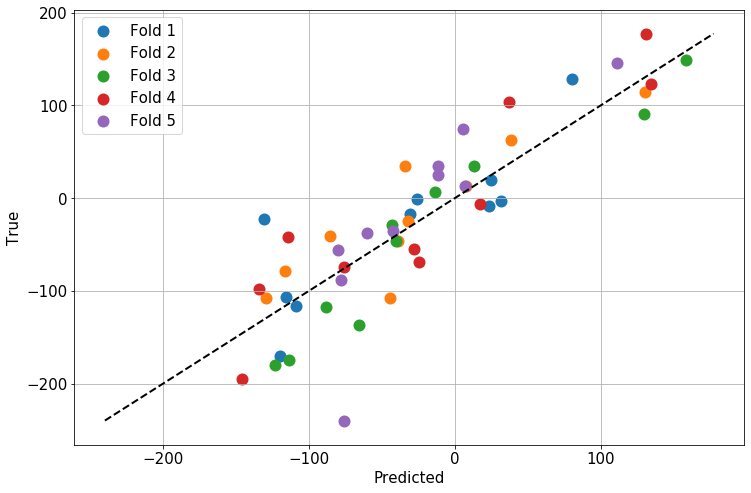

In [594]:
random_fores_10_scores = train_validate_model(RandomForestRegressor(n_estimators = 10), allscores, X, Y)

comparission_scores.append(random_fores_10_scores)

Next we are going to obtain the evaluation scores for the set of models using as number of estimators: 100.

In [595]:
model = RandomForestRegressor(n_estimators = 100)

# 5 Fold Cross Validation
cv = KFold(n_splits=5, shuffle=True)

allscores = []

for i in range(1,5):
    
    #We select the k best features based on the F-value between label and features
    X_selection = SelectKBest(f_regression, k=i).fit_transform(X, Y)
    
    mean_absolute_error_score = []
    
    for train, test in cv.split(X,Y):

        prediction = model.fit(X_selection[train], Y.iloc[train]).predict(X_selection[test])

        mean_absolute_error_score.append(mean_absolute_error(Y.iloc[test], prediction))
    
    allscores.append([i, (np.array(mean_absolute_error_score).mean()), np.array(mean_absolute_error_score).std() * 2])

Now we will use the function described above in order to obtain result of the best model for the Random Forest Regressor algorithm with 100 estimators.

We will store the resulting scores obtained by the best models in order to compare them at the end.

Number of features used: 4
Features used: ['x1', 'x2', 'x3', 'x4']
Mean Absolute error: 29.588202809628058 +/- 22.36623186982962
Mean Squared error: 1637.4595778365103 +/- 2352.3418891914143
R2 score: 0.8061524718184604 +/- 0.2911201600019284


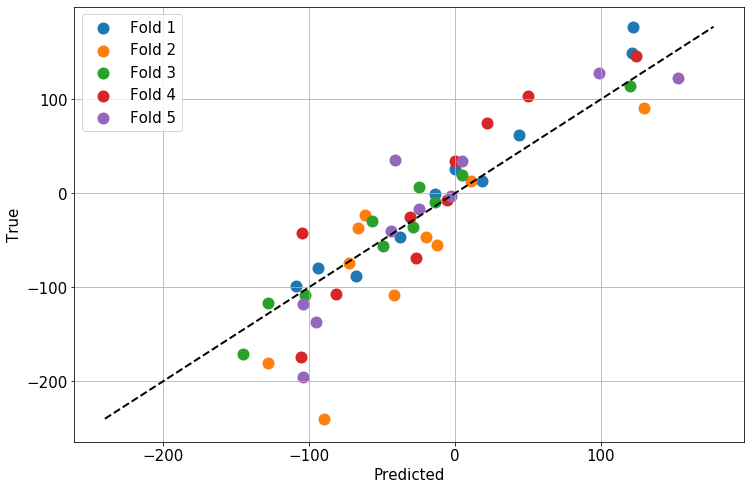

In [596]:
random_fores_100_scores = train_validate_model(RandomForestRegressor(n_estimators = 100), allscores, X, Y)

comparission_scores.append(random_fores_100_scores)

Finally, we are going to obtain the evaluation scores for the set of models using as number of estimators: 500.

In [597]:
model = RandomForestRegressor(n_estimators = 500)

cv = KFold(n_splits=5, shuffle=True)

allscores = []

for i in range(1,5):
    
    #We select the k best features based on the F-value between label and features
    X_selection = SelectKBest(f_regression, k=i).fit_transform(X, Y)
    
    mean_absolute_error_score = []
    
    for train, test in cv.split(X,Y):

        prediction = model.fit(X_selection[train], Y.iloc[train]).predict(X_selection[test])

        mean_absolute_error_score.append(mean_absolute_error(Y.iloc[test], prediction))
    
    allscores.append([i, (np.array(mean_absolute_error_score).mean()), np.array(mean_absolute_error_score).std() * 2])

Now we will use the function described above in order to obtain result of the best model for the Random Forest Regressor algorithm with 500 estimators.

We will store the resulting scores obtained by the best models in order to compare them at the end.

Number of features used: 4
Features used: ['x1', 'x2', 'x3', 'x4']
Mean Absolute error: 30.5635520441733 +/- 19.026457459119737
Mean Squared error: 1736.594535003945 +/- 2300.1717760330844
R2 score: 0.7998857057192417 +/- 0.20211154533676606


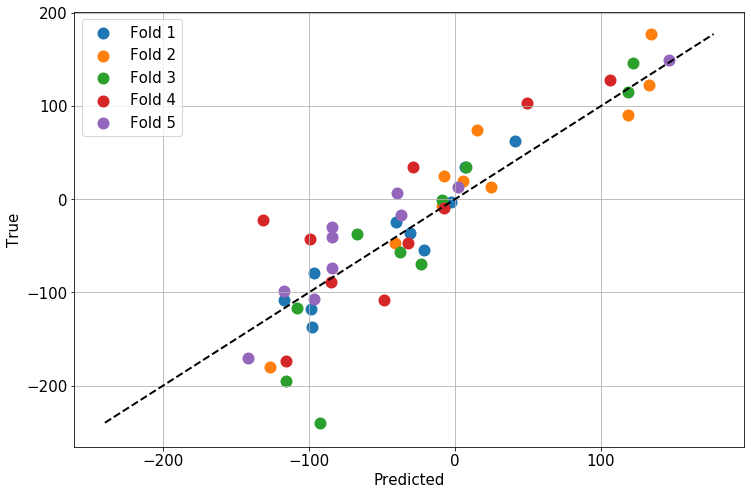

In [598]:
random_fores_500_scores = train_validate_model(RandomForestRegressor(n_estimators = 500), allscores, X, Y)

comparission_scores.append(random_fores_500_scores)

As we can see, the best performance of all algorithms is obtained when we include the 4 features in the training set.

Finally, in order to compare the results, we are going to plot the scores with their standard deviation (Mean Absolute Error, Mean Squared Error) of the best model of each algorithm.

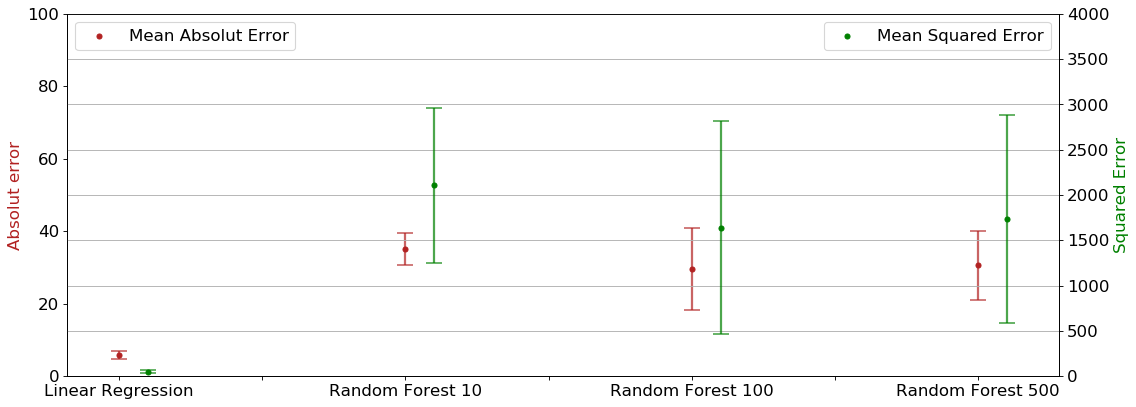

In [603]:
comparission_scores = np.array(comparission_scores)

fig, ax = plt.subplots(figsize=(16,6), dpi= 80)
x_labels = ["", "Linear Regression", "", "Random Forest 10", "", "Random Forest 100", "", "Random Forest 500"]

x =[0,1,2,3]
x_offset = [0.1,1.1,2.1,3.1]

ax.vlines(x=x, ymin=comparission_scores[:,0,0] - comparission_scores[:,0,1]/2, ymax=comparission_scores[:,0,0] + comparission_scores[:,0,1]/2, color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=x, y=comparission_scores[:,0,0], s=20, color='firebrick', alpha=1,  marker = "o", label='Mean Absolut Error')
ax.scatter(x=x, y=comparission_scores[:,0,0] + comparission_scores[:,0,1]/2, s=200, color='firebrick', alpha=0.7, marker = "_")
ax.scatter(x=x, y=comparission_scores[:,0,0] - comparission_scores[:,0,1]/2, s=200, color='firebrick', alpha=0.7, marker = "_")
plt.ylim((0,100))

ax2 = ax.twinx()
ax2.vlines(x=x_offset, ymin=comparission_scores[:,1,0] - comparission_scores[:,1,1]/2, ymax=comparission_scores[:,1,0] + comparission_scores[:,1,1]/2, color='g', alpha=0.7, linewidth=2)
ax2.scatter(x=x_offset, y=comparission_scores[:,1,0], s=20, color='g', alpha=1,  marker = "o", label='Mean Squared Error')
ax2.scatter(x=x_offset, y=comparission_scores[:,1,0] + comparission_scores[:,1,1]/2, s=200, color='g', alpha=0.7, marker = "_")
ax2.scatter(x=x_offset, y=comparission_scores[:,1,0] - comparission_scores[:,1,1]/2, s=200, color='g', alpha=0.7, marker = "_")

plt.ylim((0,4000))
ax.legend(loc='upper left')
ax2.legend()
ax.set_xticklabels(x_labels)
ax2.set_xticklabels(x_labels)
ax.set_ylabel('Absolut error', color='firebrick')
ax2.set_ylabel('Squared Error', color='g')
plt.grid(True)

We can conclude that for this synthetic dataset, the algorithm that obtains the best performance is the Linear Regression when usign the 4 features. This algorithm obtains the best results in terms of mean of the scores between folds but also in deviation:

    - Number of features used: 4
    - Feature names: x1, x2, x3, x4
    - Mean Absolute error: 5.94 +/- 2.14
    - Mean Squared error: 51.03 +/- 30.29
    - R2 score: 0.9922 +/- 0.0081

However the Random Forest Classifier gets a much worse performance having not a worse error but also a bigger variance between folds.

## 2.Real World Dataset

For the second part of this project we are going to use a real world dataset provided by Kaggle. This dataset is a list of all pokemon with their information like Attack Points, Type, Color... In this case the regression problem will consits of predicting the Pokemon Attack Points based on the others features.

### 2.1 Loading the Dataset:

First of all, we load the dataset from the local directory.

In [543]:
#Load the Dataset

dataset = pd.read_csv('Pokemon Dataset/pokemon_alopez247.csv')

dataset.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


### 2.2 Data Analysis:

Now we will obtain the basic information fo the dataset before we move on to the preprocessing:

In [544]:
# Basic information of the Dataset

print("Size of the Dataset:")
print(dataset.shape)

Size of the Dataset:
(721, 23)


As we can see we have a total of 721 rows, this means 721 pokemons. For each Pokemon we have 23 characteristics or features. We are interested in the Attack feature since this will be used as the target.

Next, we onbtain the type of each feature:

In [545]:
#Feature types:

print("\n" + "Checking the type of each feature:")
print(dataset.dtypes)


Checking the type of each feature:
Number                int64
Name                 object
Type_1               object
Type_2               object
Total                 int64
HP                    int64
Attack                int64
Defense               int64
Sp_Atk                int64
Sp_Def                int64
Speed                 int64
Generation            int64
isLegendary            bool
Color                object
hasGender              bool
Pr_Male             float64
Egg_Group_1          object
Egg_Group_2          object
hasMegaEvolution       bool
Height_m            float64
Weight_kg           float64
Catch_Rate            int64
Body_Style           object
dtype: object


As we can observe, we have a total of 7 features that are Object types and 2 boolean features. In the preprocessing phase we will convert these variables into numeric values in roder to make this information apt for the machine learning algorithms.

Now we will display the statistical information of the numeric featues:

In [546]:
print("\n" + "Statistical information:")
dataset.describe()


Statistical information:


,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Pr_Male,Height_m,Weight_kg,Catch_Rate
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,644.000000,721.000000,721.000000,721.000000
mean,361.00000,417.945908,68.380028,75.013870,70.808599,68.737864,69.291262,65.714286,3.323162,0.553377,1.144979,56.773370,100.246879
std,208.27906,109.663671,25.848272,28.984475,29.296558,28.788005,27.015860,27.277920,1.669873,0.199969,1.044369,89.095667,76.573513
min,1.00000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.000000,0.100000,0.100000,3.000000
25%,181.00000,320.000000,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000,2.000000,0.500000,0.610000,9.400000,45.000000
50%,361.00000,424.000000,65.000000,74.000000,65.000000,65.000000,65.000000,65.000000,3.000000,0.500000,0.990000,28.000000,65.000000
75%,541.00000,499.000000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,5.000000,0.500000,1.400000,61.000000,180.000000
max,721.00000,720.000000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,6.000000,1.000000,14.500000,950.000000,255.000000


As we can observe, the Attack column has a mean value of 75.01, with a standad deviation of 29.30. The minimum Attack Points a Pokemon can have are 5 Points while the maximum is 230.

### 2.3. Preprocessing:

Now we are going to process the information in order to adapt it for the training stage:


As we can observe, in our dataset we have a column named Total. This column represents the sum of the Attack, Denfense Speed Attack, Speed Defense and Speed Columns. As this colum is a linear function of the Attack column, we will remove it for the trainign phase.

In [547]:
#Starting the preprocessing

dataset = dataset.drop(["Total"], axis=1)

Next we will check if the dataset has null values:

In [548]:
print("Checking for null values")
print(dataset.isnull().sum()[dataset.isnull().sum() > 0])

Checking for null values
Type_2         371
Pr_Male         77
Egg_Group_2    530
dtype: int64


As we can see, we have null values and features whose values are non object type. We are going to replace the null values by zero.

In [549]:
dataset.fillna(0, inplace = True)

Now, we will check which columns contain object type values:

In [550]:
print("\n" + "Checking for objet types")
print(dataset.dtypes[dataset.dtypes == object])


Checking for objet types
Name           object
Type_1         object
Type_2         object
Color          object
Egg_Group_1    object
Egg_Group_2    object
Body_Style     object
dtype: object


We convert the object type values to a numeric value using the function described bellow.

This function assings consecutives integers to each unique object value.

This function has been copied from: https://pythonprogramming.net/working-with-non-numerical-data-machine-learning-tutorial/

In [551]:
def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

We will use this function to convert all object type values into numerical value. Finally, we add the Attack column at the end of the dataset as the Label or target.

In [552]:
numerical_dataset =  handle_non_numerical_data(dataset.drop(["Attack"], axis=1))

numerical_dataset =  numerical_dataset.join(dataset["Attack"])

Checking again for null or NaN values and object types.

In [553]:
print("Checking for null values")
print(numerical_dataset.isnull().sum()[numerical_dataset.isnull().sum() > 0])

print("\n" + "Checking for objet types")
print(numerical_dataset.dtypes[numerical_dataset.dtypes == object])

Checking for null values
Series([], dtype: int64)

Checking for objet types
Series([], dtype: object)


Finally, due to the Number and Name columns have a unique value for each pokemon, they do not provide any additional information, therefore, we drop them from the original dataset.

In [554]:
numerical_dataset.drop(["Number", "Name"], axis=1, inplace = True)

In [555]:
numerical_dataset.head()

,Type_1,Type_2,HP,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style,Attack
0,0,12,45,49,65,65,45,1,0,0,1,0.875,2,0,0,0.71,6.9,45,9,49
1,0,12,60,63,80,80,60,1,0,0,1,0.875,2,0,0,0.99,13.0,45,9,62
2,0,12,80,83,100,100,80,1,0,0,1,0.875,2,0,1,2.01,100.0,45,9,82
3,10,0,39,43,60,50,65,1,0,2,1,0.875,2,11,0,0.61,8.5,45,2,52
4,10,0,58,58,80,65,80,1,0,2,1,0.875,2,11,0,1.09,19.0,45,2,64


After preporcessing the dataset, the new dataset contains only 19 Feauters plus the Target:

In [556]:
# Basic information of the Dataset

print("Size of the Dataset:")
print(numerical_dataset.shape)

Size of the Dataset:
(721, 20)


As the dataset now only contains numerical values, we can display the statistical information of all features:

In [557]:
print("\n" + "Statistical information:")
numerical_dataset.describe()


Statistical information:


,Type_1,Type_2,HP,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style,Attack
count,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,7.509015,4.886269,68.380028,70.808599,68.737864,69.291262,65.714286,3.323162,0.063800,4.255201,0.893204,0.494279,5.850208,2.429958,0.063800,1.144979,56.773370,100.246879,7.124827,75.013870
std,4.990573,6.180466,25.848272,29.296558,28.788005,27.015860,27.277920,1.669873,0.244566,2.947938,0.309068,0.254878,4.767340,3.270388,0.244566,1.044369,89.095667,76.573513,4.274726,28.984475
min,0.000000,0.000000,1.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.100000,3.000000,0.000000,5.000000
25%,3.000000,0.000000,50.000000,50.000000,45.000000,50.000000,45.000000,2.000000,0.000000,1.000000,1.000000,0.500000,1.000000,1.000000,0.000000,0.610000,9.400000,45.000000,2.000000,53.000000
50%,7.000000,0.000000,65.000000,65.000000,65.000000,65.000000,65.000000,3.000000,0.000000,5.000000,1.000000,0.500000,4.000000,1.000000,0.000000,0.990000,28.000000,65.000000,8.000000,74.000000
75%,11.000000,12.000000,80.000000,85.000000,90.000000,85.000000,85.000000,5.000000,0.000000,6.000000,1.000000,0.500000,10.000000,1.000000,0.000000,1.400000,61.000000,180.000000,11.000000,95.000000
max,17.000000,18.000000,255.000000,230.000000,154.000000,230.000000,160.000000,6.000000,1.000000,9.000000,1.000000,1.000000,14.000000,13.000000,1.000000,14.500000,950.000000,255.000000,13.000000,165.000000


### 2.4 Data Visualization:

In this part, we will obtain some basic represetations of the data in order to obtain some understanding of the information distribution. We will display the next graphs:

    - Histogram with respective Box plot
    - Feature-Target scatter plot with regression and kernel density fits 

As the number of features is elevated, we are going to select the 4 most important variables using the SelectKBest function based on the F-scored obtained after calculating the correlation between each regressor and the target.

In [558]:
#Obtaining the feature used names k best features based on the F-value between label and features

feature_names = list(numerical_dataset.iloc[:,:-1].columns.values)
mask = SelectKBest(f_regression, k=4).fit(numerical_dataset.iloc[:,:-1], numerical_dataset.iloc[:,-1]).get_support()
selected_features = [] # The list of K best features
for bool, feature in zip(mask, feature_names):
    if bool:
        selected_features.append(feature)
        
visualization_dataset = numerical_dataset[new_features]
print(selected_features)

['HP', 'Defense', 'Weight_kg', 'Catch_Rate']


#### 1.4.1 Histogram with Box plot

This representation will display the values distribution of each feature in two different ways, first in a Histogram and secondly in a Box plot.

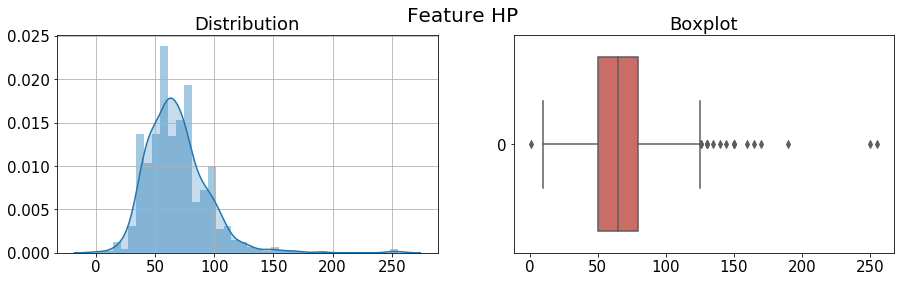

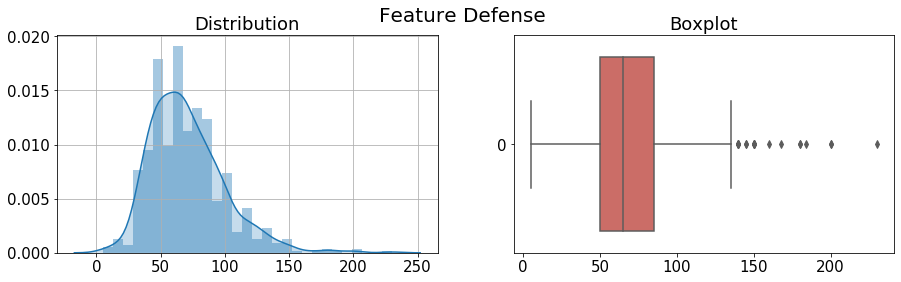

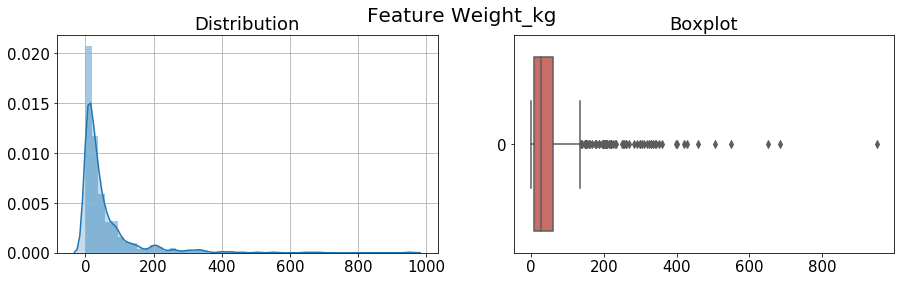

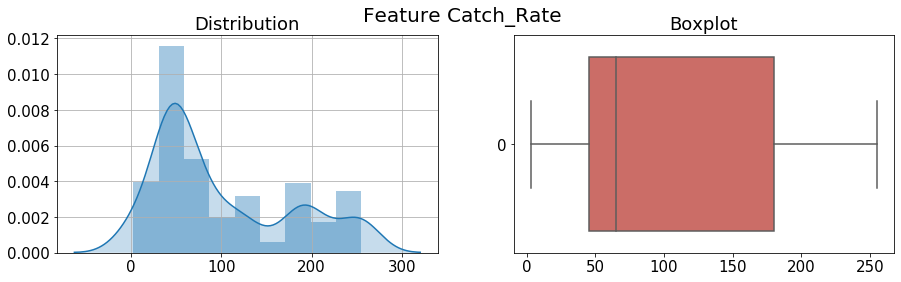

In [559]:
for i in list(visualization_dataset.columns.values):
    
    fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False, figsize=(15,4))

    fig.suptitle("Feature " + i, fontsize=20)
    ax[0].title.set_text('Distribution')
    ax[0].grid(True)
    sns.distplot(visualization_dataset[i], hist=True, axlabel=False, kde=True, kde_kws={"shade": True}, ax=ax[0])


    ax[1].title.set_text('Boxplot')
    plt.rcParams.update({'font.size': 15})
    sns.boxplot(data=visualization_dataset[i], orient="h", palette=sns.color_palette("hls", 8))

    plt.show()

The histograms of the selected features show a more irregular distribution. From the boxplots we can conclude that the values under the mean are concentrated in a small range while the values over the mean are much more extended. It is also interesting to notice that in this dataset we have a high number of outliers, particularly the feature Weight Kg. These outliers will affect negatively to the scores due to it is probable that the outliers will be far from the regression line.

#### 1.4.2 Feature-Target scatter plot with regression

In this representation we can obtain a first approach to the regression model. In this case we obtain the regression for each feature and the target. We can also see the distribution or histogram of the represented variables.

<Figure size 1152x720 with 0 Axes>

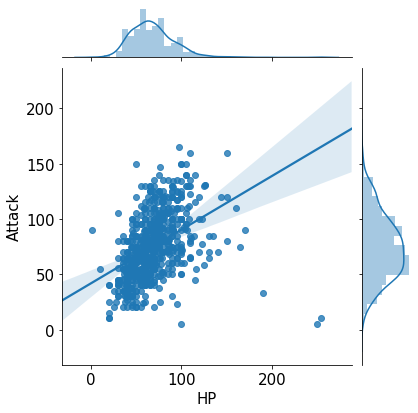

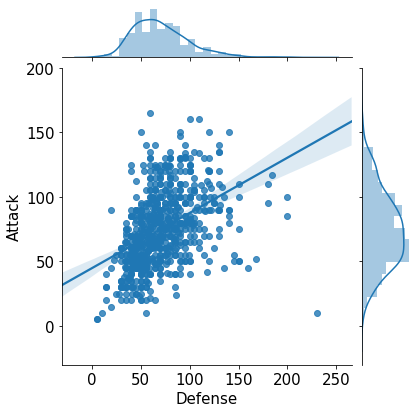

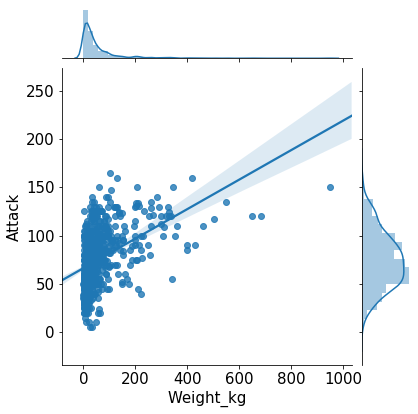

In [525]:
plt.figure(figsize=(16,10))

for i in list(visualization_dataset.columns.values)[:-1]:
    sns.jointplot(x=visualization_dataset[i], y=numerical_dataset["Attack"], data=visualization_dataset, dropna=True, kind='reg')

As we can observe, the features are pretty disperse making hard to obtain a good regression line by using only one variable. We will check if we can estimate the Target variable by using more than one feature in the Training and Testing phase.

### 2.5 Training and Testing:

Similarly to the synthetic dataset, in this phase we are going to apply two regression algorithms in order to predict the values of the target variable:

- Linear Regression
- Random Forest Regressor

For each algorithm we will train a set of models based on the number of features used and the hyperparameters of the model (we only perform hyperparameter tunning on the Random Forest Regressor). We will validate each model applying a 5 Cross Fold Validation obtaining the prediction of each fold and it scores. We use the next metrics in order to evauate the model performance:

- Mean Absolute error
- Mean Squared error
- R2 score

Finally, for each model, we will display the Predicted-True value plot in order to get a general idea of the model performance.

The procedure followed for obtaining the best model consists of first training the set of models varying the number of features selected for each model. Then we obtain the Mean Absolute Error of each model and select the model with the best performance. Finally, we train again the model with the best performance obtaining the rest of the metrics, the name of the used features and displaying the Predicted-True value plot.

In [542]:
#Dividing the datasets

X = numerical_dataset.iloc[:,:-1]
Y = numerical_dataset.iloc[:,-1]

#### 2.5.1 Linear Regression

The first algorithm is Linear Regression. We will train a total of 19 models based on the number of features used. In order to obtain the most important features (those more correlated with the target), we use the SelectKBest function based on the F-scored obtained after calculating the correlation between each regressor and the target.

Next we are going to obtain the evaluation scores for the set of models based on this algorithm:

In [527]:
model = LinearRegression()

# 5 Fold Cross Validation
cv = KFold(n_splits=5, shuffle=True)

allscores = []

for i in range(1, len(numerical_dataset.columns.values)):
    
    #We select the k best features based on the F-value between label and features
    X_selection = SelectKBest(f_regression, k=i).fit_transform(X, Y)
    
    mean_absolute_error_score = []
    
    for train, test in cv.split(X,Y):

        prediction = model.fit(X_selection[train], Y.iloc[train]).predict(X_selection[test])

        mean_absolute_error_score.append(mean_absolute_error(Y.iloc[test], prediction))
    
    allscores.append([i, (np.array(mean_absolute_error_score).mean()), np.array(mean_absolute_error_score).std() * 2])

Once we have obtained the scores for all the models, we will select the best one based on the mean absoute error by using the function we described and used in the synthetic dataset part:

We will store the resulting scores obtained by the best models in order to compare them at the end.

Number of features used: 19
Features used: ['Type_1', 'Type_2', 'HP', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary', 'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2', 'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate', 'Body_Style']
Mean Absolute error: 15.968289986554936 +/- 1.3000983665733923
Mean Squared error: 425.60626796191593 +/- 60.15427634597339
R2 score: 0.4895243035342932 +/- 0.06918481396499718


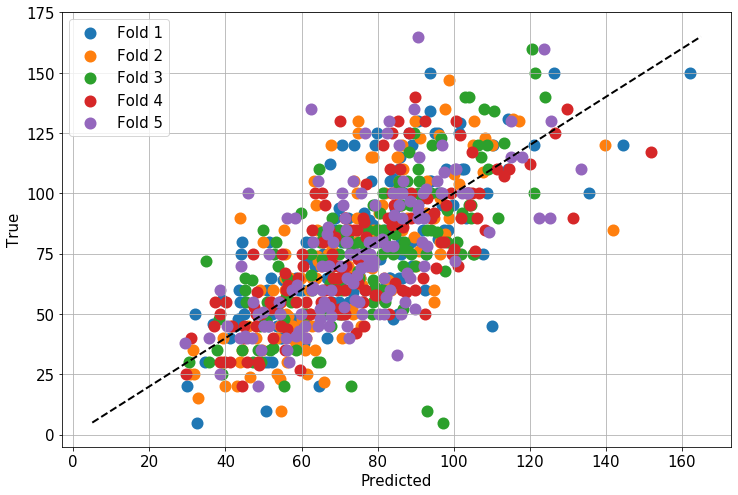

In [528]:
comparission_scores = []

linear_regression_scores = train_validate_model(LinearRegression(), allscores, X, Y)

comparission_scores.append(linear_regression_scores)

#### 2.5.2 Random Forest Regressor

The second algorithm is the Random Forest Regressor. For each hyperparameter configuration we will train again 19 models based on the features used. We will tune the number of estimators (number of trees) with the next value:

    - Number of estimators: 10, 100 and 500
    
Next we are going to obtain the evaluation scores for the set of models using as number of estimators: 10.

In [529]:
model = RandomForestRegressor(n_estimators = 10)

# 5 Fold Cross Validation
cv = KFold(n_splits=5, shuffle=True)

allscores = []

for i in range(1, len(numerical_dataset.columns.values)):
    
    #We select the k best features based on the F-value between label and features
    X_selection = SelectKBest(f_regression, k=i).fit_transform(X, Y)
    
    mean_absolute_error_score = []
    
    for train, test in cv.split(X,Y):

        prediction = model.fit(X_selection[train], Y.iloc[train]).predict(X_selection[test])

        mean_absolute_error_score.append(mean_absolute_error(Y.iloc[test], prediction))
    
    allscores.append([i, (np.array(mean_absolute_error_score).mean()), np.array(mean_absolute_error_score).std() * 2])

Once we have obtained the scores for all the models, we will select the best one for the Random Forest Regressor algorithm with 10 estimators based on the mean absoute error by using the function we described and used in the synthetic dataset part:

We will store the resulting scores obtained by the best models in order to compare them at the end.

Number of features used: 19
Features used: ['Type_1', 'Type_2', 'HP', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary', 'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2', 'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate', 'Body_Style']
Mean Absolute error: 16.07872318007663 +/- 1.7053797433358349
Mean Squared error: 425.4954336206896 +/- 71.51656162375517
R2 score: 0.4851399162596125 +/- 0.11548463774569746


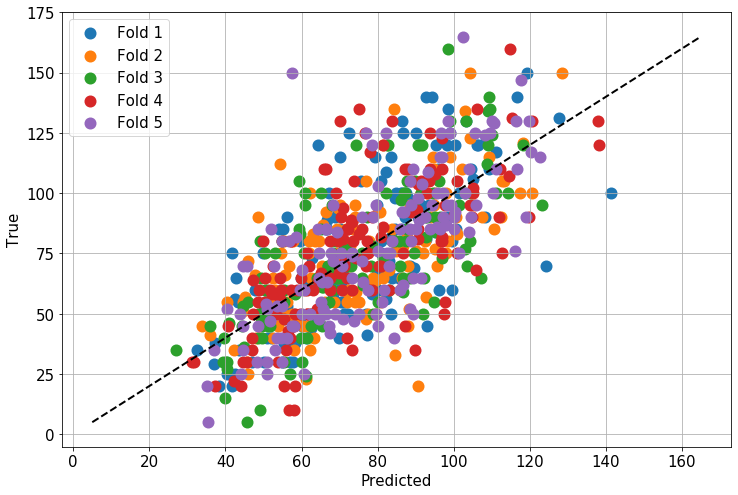

In [530]:
random_fores_10_scores = train_validate_model(RandomForestRegressor(n_estimators = 10), allscores, X, Y)

comparission_scores.append(random_fores_10_scores)

Next we are going to obtain the evaluation scores for the set of models using as number of estimators: 100.

In [531]:
model = RandomForestRegressor(n_estimators = 100)

# 5 Fold Cross Validation
cv = KFold(n_splits=5, shuffle=True)

allscores = []

for i in range(1, len(numerical_dataset.columns.values)):
    
    #We select the k best features based on the F-value between label and features
    X_selection = SelectKBest(f_regression, k=i).fit_transform(X, Y)
    
    mean_absolute_error_score = []
    
    for train, test in cv.split(X,Y):

        prediction = model.fit(X_selection[train], Y.iloc[train]).predict(X_selection[test])

        mean_absolute_error_score.append(mean_absolute_error(Y.iloc[test], prediction))
    
    allscores.append([i, (np.array(mean_absolute_error_score).mean()), np.array(mean_absolute_error_score).std() * 2])

Once we have obtained the scores for all the models, we will select the best one for the Random Forest Regressor algorithm with 100 estimators based on the mean absoute error by using the function we described and used in the synthetic dataset part:

We will store the resulting scores obtained by the best models in order to compare them at the end.

Number of features used: 19
Features used: ['Type_1', 'Type_2', 'HP', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary', 'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2', 'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate', 'Body_Style']
Mean Absolute error: 14.930365804597702 +/- 2.518972211821412
Mean Squared error: 372.6074592710728 +/- 86.21778972748801
R2 score: 0.5514604731591772 +/- 0.12688791438438848


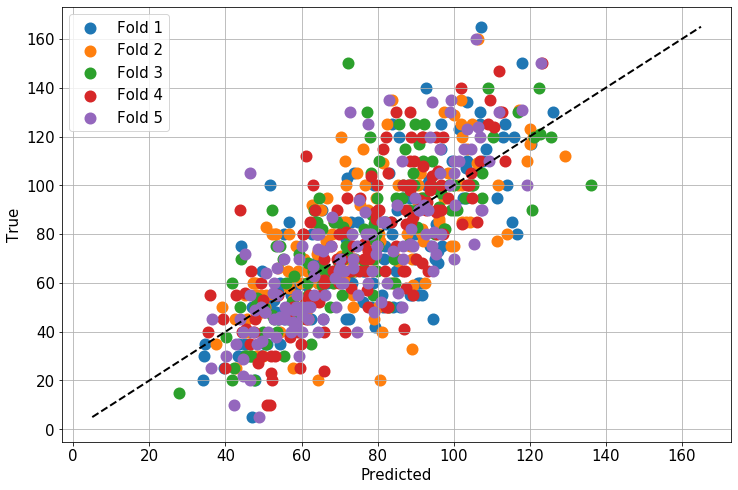

In [532]:
random_fores_100_scores = train_validate_model(RandomForestRegressor(n_estimators = 100), allscores, X, Y)

comparission_scores.append(random_fores_100_scores)

Finally, we are going to obtain the evaluation scores for the set of models using as number of estimators: 500.

In [533]:
model = RandomForestRegressor(n_estimators = 500)

# 5 Fold Cross Validation
cv = KFold(n_splits=5, shuffle=True)

allscores = []

for i in range(1, len(numerical_dataset.columns.values)):
    
    #We select the k best features based on the F-value between label and features
    X_selection = SelectKBest(f_regression, k=i).fit_transform(X, Y)
    
    mean_absolute_error_score = []
    
    for train, test in cv.split(X,Y):

        prediction = model.fit(X_selection[train], Y.iloc[train]).predict(X_selection[test])

        mean_absolute_error_score.append(mean_absolute_error(Y.iloc[test], prediction))
    
    allscores.append([i, (np.array(mean_absolute_error_score).mean()), np.array(mean_absolute_error_score).std() * 2])

Once we have obtained the scores for all the models, we will select the best one for the Random Forest Regressor algorithm with 500 estimators based on the mean absoute error by using the function we described and used in the synthetic dataset part:

We will store the resulting scores obtained by the best models in order to compare them at the end.

Number of features used: 19
Features used: ['Type_1', 'Type_2', 'HP', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary', 'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2', 'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate', 'Body_Style']
Mean Absolute error: 15.074617183908043 +/- 1.6776856299383651
Mean Squared error: 370.9939957518391 +/- 86.30526923787922
R2 score: 0.554121576856019 +/- 0.08944416092576583


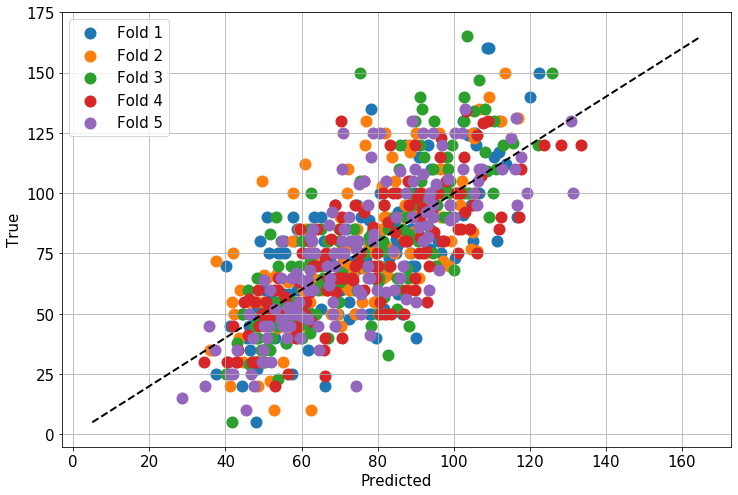

In [534]:
random_fores_500_scores = train_validate_model(RandomForestRegressor(n_estimators = 500), allscores, X, Y)

comparission_scores.append(random_fores_500_scores)

As we can see, the best performance of all algorithms is obtained when we include all the features (19) in the training set.

Finally, in order to compare the results, we are going to plot the scores with their standard deviation (Mean Absolute Error, Mean Squared Error) of the best model of each algorithm.

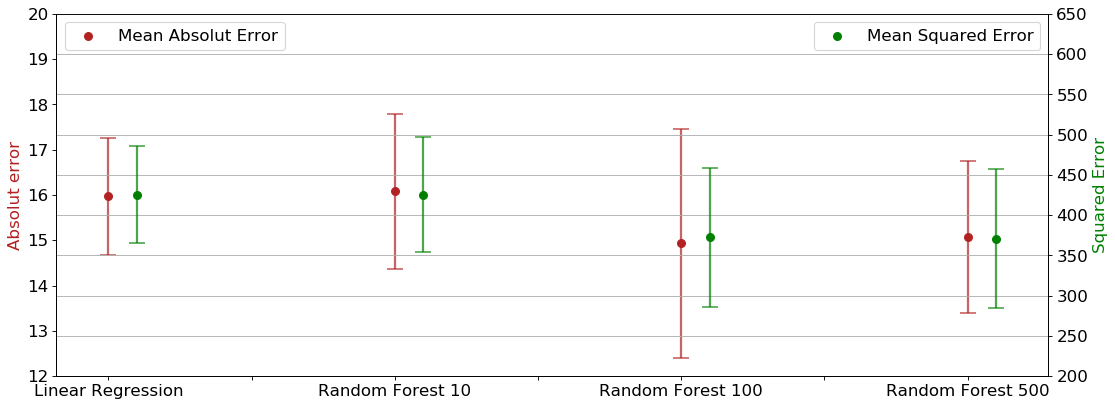

In [536]:
comparission_scores = np.array(comparission_scores)

fig, ax = plt.subplots(figsize=(16,6), dpi= 80)
x_labels = ["", "Linear Regression", "", "Random Forest 10", "", "Random Forest 100", "", "Random Forest 500"]

x =[0,1,2,3]
x_offset = [0.1,1.1,2.1,3.1]

ax.vlines(x=x, ymin=comparission_scores[:,0,0] - comparission_scores[:,0,1], ymax=comparission_scores[:,0,0] + + comparission_scores[:,0,1], color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=x, y=comparission_scores[:,0,0], s=50, color='firebrick', alpha=1,  marker = "o", label='Mean Absolut Error')
ax.scatter(x=x, y=comparission_scores[:,0,0] + comparission_scores[:,0,1], s=200, color='firebrick', alpha=0.7, marker = "_")
ax.scatter(x=x, y=comparission_scores[:,0,0] - comparission_scores[:,0,1], s=200, color='firebrick', alpha=0.7, marker = "_")
plt.ylim((12,20))

ax2 = ax.twinx()
ax2.vlines(x=x_offset, ymin=comparission_scores[:,1,0] - comparission_scores[:,1,1], ymax=comparission_scores[:,1,0] + comparission_scores[:,1,1], color='g', alpha=0.7, linewidth=2)
ax2.scatter(x=x_offset, y=comparission_scores[:,1,0], s=50, color='g', alpha=1,  marker = "o", label='Mean Squared Error')
ax2.scatter(x=x_offset, y=comparission_scores[:,1,0] + comparission_scores[:,1,1], s=200, color='g', alpha=0.7, marker = "_")
ax2.scatter(x=x_offset, y=comparission_scores[:,1,0] - comparission_scores[:,1,1], s=200, color='g', alpha=0.7, marker = "_")

plt.ylim((200,650))
ax.legend(loc='upper left')
ax2.legend()
ax.set_xticklabels(x_labels)
ax2.set_xticklabels(x_labels)
ax.set_ylabel('Absolut error', color='firebrick')
ax2.set_ylabel('Squared Error', color='g')
plt.grid(True)

We can conclude that for the Pokemon Dataset Regression problem, the algorithm tha obtains the best performance is the Random Forest classifier. This alogrithm seems to estimate the target better than the Linear Regression when the features distribution is more irregular and the correlation between features and target is lower. 

It is important to add that the number of features used by the best models was 19 in all cases. That is to say, all features provide useful information.

The best hyperparameter tuning for the Random Forest regressor is not that clear having the Random Forest with 100 tress and the Random Forest with 500 trees a similar result:

Random Forest 100:
    
    - Number of features used: 19
    - Mean Absolute error: 14.93 +/- 2.52
    - Mean Squared error: 372.61 +/- 86.22
    - R2 score: 0.5515 +/- 0.1269
    

Random Forest 500:

    - Number of features used: 19
    - Mean Absolute error: 15.08 +/- 1.68
    - Mean Squared error: 370.99 +/- 86.31
    - R2 score: 0.5541 +/- 0.0894


Despite the Random Forest 500 has a slightly higher Mean Absolute error, the variance of this score compared to Random Forest 100 is better. Furthermore, the Mean Squared error is better in the case of the Random Forest 500 which means that the mean deviance between the predicted value and the real value is lower. Finally, the R2 score is better in the second model since a higer value of this score represents a better perfomance. So we can conclude that the Random Forest 500 obtains the best result for the Pokemon Regression problem.